
🔹 Top Features Correlated with Electricity Prices:

∅ DE/LU neighbours [€/MWh] Original resolutions    0.947588
Netherlands [€/MWh] Original resolutions           0.946912
Denmark 1 [€/MWh] Original resolutions             0.916323
Czech Republic [€/MWh] Original resolutions        0.912776
Austria [€/MWh] Original resolutions               0.911766
Belgium [€/MWh] Original resolutions               0.910114
Denmark 2 [€/MWh] Original resolutions             0.863247
France [€/MWh] Original resolutions                0.784921
Poland [€/MWh] Original resolutions                0.768401
Switzerland [€/MWh] Original resolutions           0.744303
Name: Germany/Luxembourg [€/MWh] Original resolutions, dtype: float64


c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\virtual_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\Elite\AppData\Local\Temp\ipykernel_3428\853632950.py:59: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


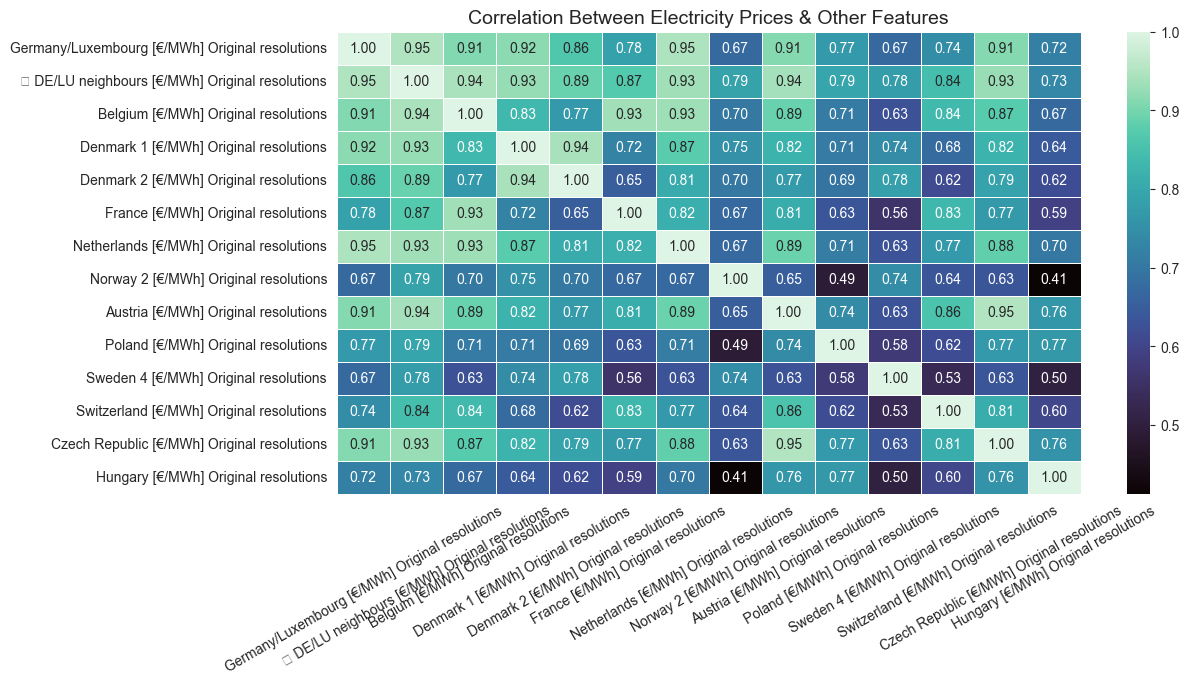

✅ Correlation heatmap saved as 'feature_correlation_heatmap.png'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================
# 📌 Define Paths
# =========================
PLOTS_DIR = "../visualizations"
os.makedirs(PLOTS_DIR, exist_ok=True)  # Ensure directory exists

# =========================
# 📌 Load Dataset
# =========================
file_path = "../data/transformed/transformed_refined_Day-ahead_prices_202301010000_202503050000_Hour.csv"
df = pd.read_csv(file_path, delimiter=",")

# Convert time column to datetime
df["Start date"] = pd.to_datetime(df["Start date"], errors="coerce")

# Ensure numeric price column
target_column = "Germany/Luxembourg [€/MWh] Original resolutions"
df[target_column] = pd.to_numeric(df[target_column], errors="coerce")

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=["number"]).dropna()

# =========================
# 📌 Compute Correlation Matrix
# =========================
corr_matrix = df_numeric.corr()

# Get correlation values with electricity prices
price_correlations = corr_matrix[target_column].drop(target_column).abs().sort_values(ascending=False)

# Print top correlated features
print("\n🔹 Top Features Correlated with Electricity Prices:\n")
print(price_correlations.head(10))  

# =========================
# 📌 Plot Heatmap
# =========================
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Cleaner grid style

sns.heatmap(corr_matrix, annot=True, cmap="mako", fmt=".2f", linewidths=0.5, cbar=True)

# =========================
# 📌 Labels, Title & Formatting
# =========================
plt.title("Correlation Between Electricity Prices & Other Features", fontsize=14)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)

# =========================
# 📌 Save & Show Plot
# =========================
plot_filename = "feature_correlation_heatmap.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"✅ Correlation heatmap saved as '{plot_filename}'.")
